# MODEL GEERATOR AND ANOMALY DETECTOR

In [1]:
from ModelGenerator import ModelGenerator
import pickle

In [13]:
c = [
    ['HMM', [15, 'full', 100]],
    ['DENSEAE', [[8, 32, 16, 32, 8], 'elu', 'sigmoid', 0.1, 'rmsprop', 'mse']],
    ['CONVAE', [[(32, 7, 2), (16, 7, 2), (16, 7, 1)], 'same', 'elu', 'adam', 'mse']],
    ['LSTMAE', [[32, 16, 8], 'relu', 'rmsprop', 'mse']],
    ['LSTM', [[32, 16, 8], 'relu', 'rmsprop', 'mse']]
]

with open('config.pkl', 'wb') as f:
   pickle.dump(c, f)

In [14]:
gen = ModelGenerator('config.pkl', (10,8), 1)
models = gen.get_models()

In [15]:
for model in models:
    print(type(model))

<class 'models.HMM.HMM'>
<class 'models.DENSEAE.DenseAE'>
<class 'models.CONVAE.ConvAE'>
<class 'models.LSTMAE.LstmAE'>
<class 'models.LSTM.LstmPred'>


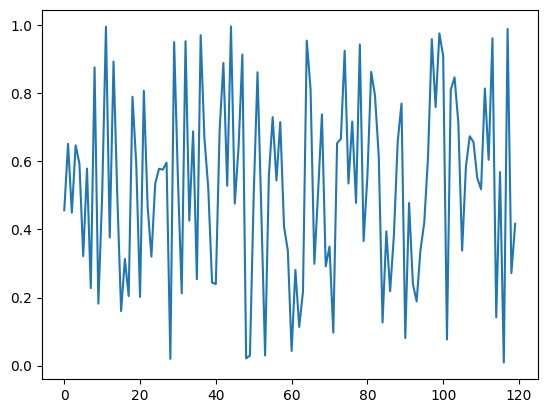

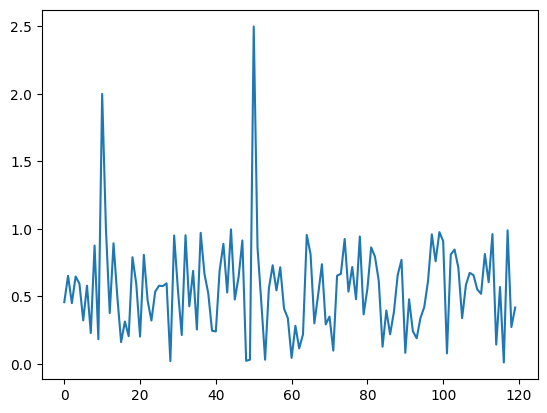

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from anomaly_metrics.ThresholdMetric import ThresholdMetric
from anomaly_metrics.POTMetric import POTMetric
from anomaly_metrics.OBASMetric import OBASMetric

residual = np.random.random(120)

plt.plot(residual)
plt.show()

residual_ano = residual.copy()
residual_ano[10] = 2
residual_ano[50] = 2.5

plt.plot(residual_ano)
plt.show()

1 1


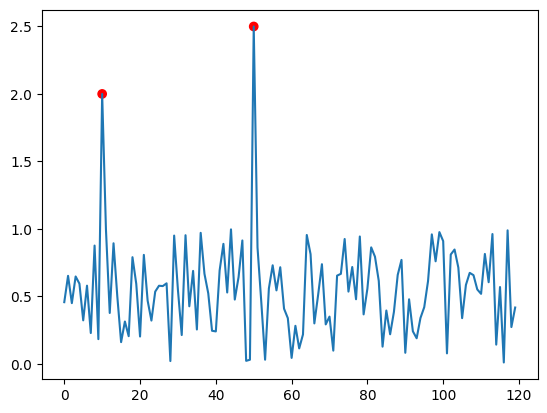

In [2]:
thre = ThresholdMetric()
thre.calculate_params(residual)
anomalies = thre.detect_anomalies(residual_ano)

print(anomalies[10], anomalies[50])

plt.plot(residual_ano)
plt.scatter([list(residual_ano).index(x) for x in residual_ano[anomalies == 1]], residual_ano[anomalies == 1], c=['r' for x in range(residual_ano[anomalies == 1].shape[0])])
plt.show()

1 1


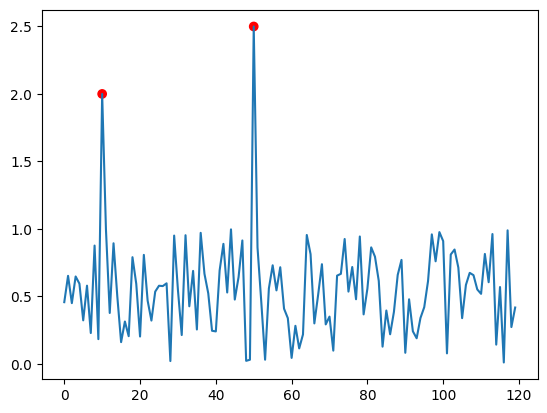

In [3]:
obas = OBASMetric()
obas.calculate_params(residual)
anomalies = obas.detect_anomalies(residual_ano)

print(anomalies[10], anomalies[50])

plt.plot(residual_ano)
plt.scatter([list(residual_ano).index(x) for x in residual_ano[anomalies == 1]], residual_ano[anomalies == 1], c=['r' for x in range(residual_ano[anomalies == 1].shape[0])])
plt.show()

1 1


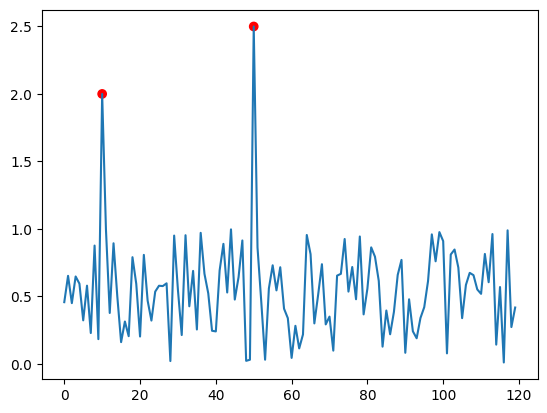

In [4]:
pot = POTMetric()
pot.calculate_params(residual)
anomalies = pot.detect_anomalies(residual_ano)

print(anomalies[10], anomalies[50])

plt.plot(residual_ano)
plt.scatter([list(residual_ano).index(x) for x in residual_ano[anomalies == 1]], residual_ano[anomalies == 1], c=['r' for x in range(residual_ano[anomalies == 1].shape[0])])
plt.show()

In [5]:
labels = anomalies

In [6]:
from AnomalyDetector import AnomalyDetector

In [7]:
detector = AnomalyDetector()
detector.train(residual, residual_ano, labels)
anomalies = detector.detect_anomalies(residual_ano)

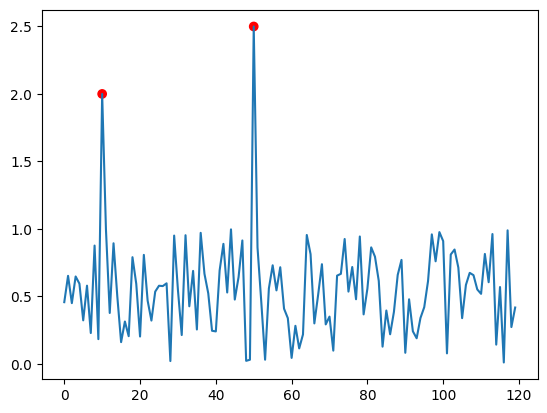

In [8]:
plt.plot(residual_ano)
plt.scatter([list(residual_ano).index(x) for x in residual_ano[anomalies == 1]], residual_ano[anomalies == 1], c=['r' for x in range(residual_ano[anomalies == 1].shape[0])])
plt.show()

# MODEL SELECTOR

In [7]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [8]:
path_to_data = 'datasets/raw/data/'

In [9]:
# benchmark files checking
all_files=[]
import os
for root, dirs, files in os.walk(path_to_data):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))



# datasets with anomalies loading
list_of_df = [pd.read_csv(file, 
                          sep=';', 
                          index_col='datetime', 
                          parse_dates=True) for file in all_files if 'anomaly-free' not in file]

list_of_df = [df.drop(columns=['changepoint']) for df in list_of_df]
# anomaly-free df loading
anomaly_free_df = pd.read_csv([file for file in all_files if 'anomaly-free' in file][0], 
                            sep=';', 
                            index_col='datetime', 
                            parse_dates=True)

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

df = list_of_df[0]

scaler = MinMaxScaler()
X = scaler.fit_transform(df[:300].drop(columns=['anomaly']))

In [11]:
X.shape

(300, 8)

In [12]:
from ModelSelector import ModelSelector

In [13]:
import pickle

c = [
    ['HMM', [15, 'full', 100]],
    ['DENSEAE', [[8, 32, 16, 32, 8], 'elu', 'sigmoid', 0.1, 'rmsprop', 'mse']],
    ['CONVAE', [[(32, 7, 2), (16, 7, 2), (16, 7, 1)], 'same', 'elu', 'adam', 'mse']],
    ['LSTMAE', [[32, 16, 8], 'relu', 'rmsprop', 'mse']],
    ['LSTM', [[32, 16, 8], 'relu', 'rmsprop', 'mse']]
]

with open('config.pkl', 'wb') as f:
   pickle.dump(c, f)

In [14]:
selector = ModelSelector(X, scaler.transform(df.drop(columns='anomaly').values), df.anomaly.values)
model = selector.evaluate()

c:\Users\Marcin_Kosiba\anaconda3\envs\inz\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


STARTING MODEL SELECTION PROCESS
MODEL GENERATION
MODEL GENERATION COMPLETED
MODEL TRAINING


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


10/10 [==============================] - 0s 2ms/step
MODEL TRAINING COMPLETED
MODEL SCORING
0.8697986577181208 0.7639902676399026
<class 'models.HMM.HMM'> 4.795558385995852
24/24 [==============================] - 0s 787us/step
0.877505535219655 0.7651006711409396 0.6823956442831216
<class 'models.DENSEAE.DenseAE'> 4.3721887834930815
23/23 [==============================] - 0s 2ms/step
(745,) (745,)
0.808231412674931 0.9302013422818792 0.8785046728971964
<class 'models.CONVAE.ConvAE'> 5.252451446545596
23/23 [==============================] - 0s 6ms/step
(745,) (745,)
0.6356258784249311 0.8859060402684564 0.7079037800687286
<class 'models.LSTMAE.LstmAE'> 4.353147038968302
23/23 [==============================] - 0s 2ms/step
(745,) (745,)
0.8262020737588357 0.9570469798657718 0.9120879120879122
<class 'models.LSTM.LstmPred'> 5.431600701976256
BEST MODEL SELECTED:  <class 'models.LSTM.LstmPred'>


In [9]:
anomalies = model.detect_anomalies(scaler.transform(df.drop(columns=['anomaly']).values))

 1/23 [>.............................] - ETA: 0s

23/23 [==============================] - 0s 2ms/step


c:\Users\Marcin_Kosiba\anaconda3\envs\inz\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [10]:
anomalies.shape

(745,)

0.9463087248322147
0.8901098901098901


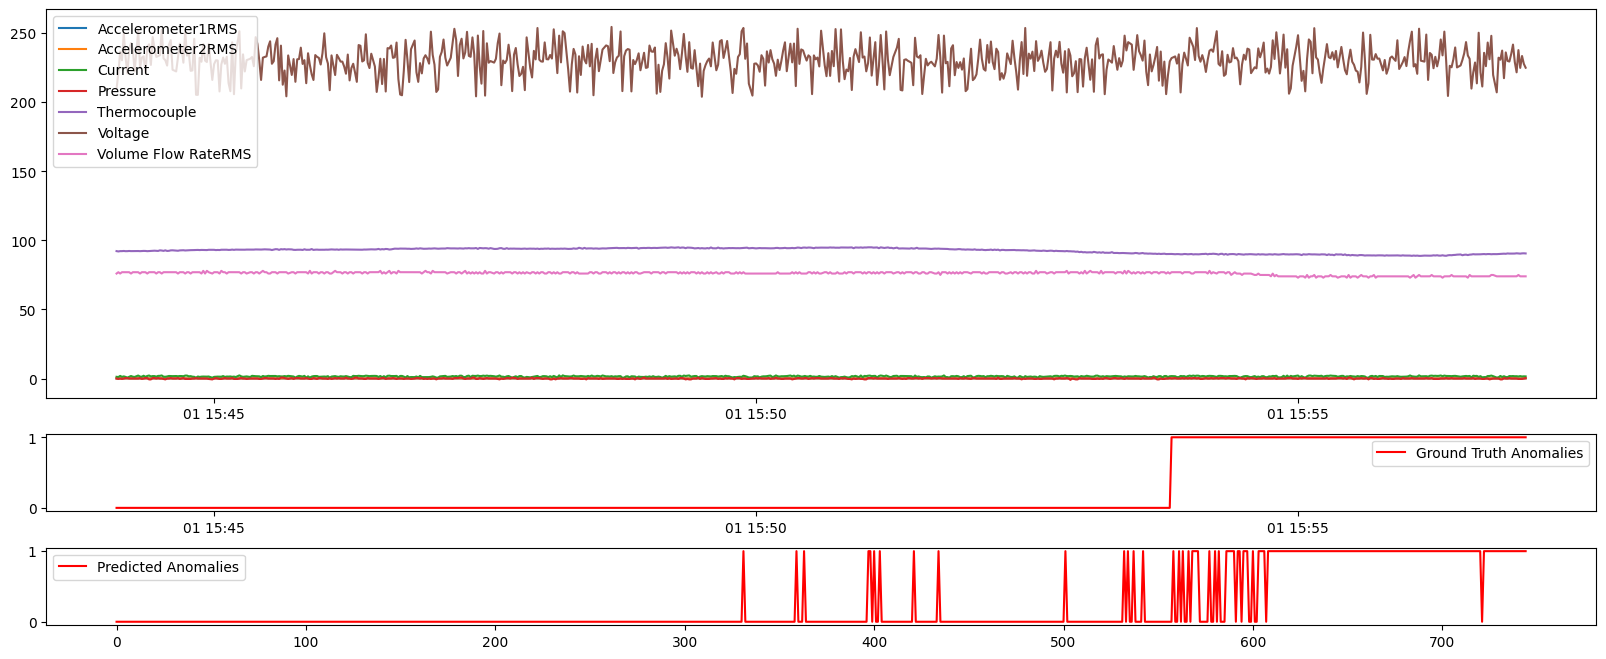

In [12]:
from utils.plot_data import plot_skab
from sklearn.metrics import accuracy_score, f1_score

print(accuracy_score(anomalies, df.anomaly))
print(f1_score(anomalies, df.anomaly))

plot_skab(df.drop(columns=['anomaly']), df.anomaly, anomalies)

# AutoAD testy

In [9]:
from AutoAD import AutoAD

In [10]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [11]:
path_to_data = 'datasets/raw/data/'

In [12]:
# benchmark files checking
all_files=[]
import os
for root, dirs, files in os.walk(path_to_data):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))



# datasets with anomalies loading
list_of_df = [pd.read_csv(file, 
                          sep=';', 
                          index_col='datetime', 
                          parse_dates=True) for file in all_files if 'anomaly-free' not in file]

list_of_df = [df.drop(columns=['changepoint']) for df in list_of_df]
# anomaly-free df loading
anomaly_free_df = pd.read_csv([file for file in all_files if 'anomaly-free' in file][0], 
                            sep=';', 
                            index_col='datetime', 
                            parse_dates=True)

In [13]:
import pickle

c = [
    ['HMM', [15, 'full', 100]],
    ['DENSEAE', [[8, 32, 16, 32, 8], 'elu', 'sigmoid', 0.1, 'rmsprop', 'mse']],
    ['CONVAE', [[(32, 7, 2), (16, 7, 2), (16, 7, 1)], 'same', 'elu', 'adam', 'mse']],
    ['LSTMAE', [[32, 16, 8], 'relu', 'rmsprop', 'mse']],
    ['LSTM', [[32, 16, 8], 'relu', 'rmsprop', 'mse']]
]

with open('config.pkl', 'wb') as f:
   pickle.dump(c, f)

## AutoAD with original test data

In [7]:
df = list_of_df[0]

detector = AutoAD(df[:400].drop(columns=['anomaly']), df.drop(columns=['anomaly']).values, df.anomaly.values)
detector.select_model()

c:\Users\Marcin_Kosiba\anaconda3\envs\inz\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


STARTING MODEL SELECTION PROCESS
MODEL GENERATION
MODEL GENERATION COMPLETED
MODEL TRAINING


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


13/13 [==============================] - 0s 2ms/step
MODEL TRAINING COMPLETED
MODEL SCORING
0.8845637583892617 0.7860696517412935
<class 'models.HMM.HMM'> 4.913406123743697
24/24 [==============================] - 0s 780us/step
0.881502652180469 0.9140939597315436 0.8545454545454546
<class 'models.DENSEAE.DenseAE'> 5.213778430093831
23/23 [==============================] - 0s 1ms/step
(745,) (745,)
0.8179049914156115 0.9557046979865772 0.9185185185185185
<class 'models.CONVAE.ConvAE'> 5.447683763476263
23/23 [==============================] - 0s 6ms/step
(745,) (745,)
0.671025120644668 0.9114093959731544 0.7870967741935483
<class 'models.LSTMAE.LstmAE'> 4.730821613392015
23/23 [==============================] - 0s 2ms/step
(745,) (745,)
0.8155289633250891 0.9664429530201343 0.9299719887955181
<class 'models.LSTM.LstmPred'> 5.501859871527296
BEST MODEL SELECTED:  <class 'models.LSTM.LstmPred'>
23/23 [==============================] - 0s 2ms/step


23/23 [==============================] - 0s 3ms/step


c:\Users\Marcin_Kosiba\anaconda3\envs\inz\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0.9664429530201343
0.9299719887955181


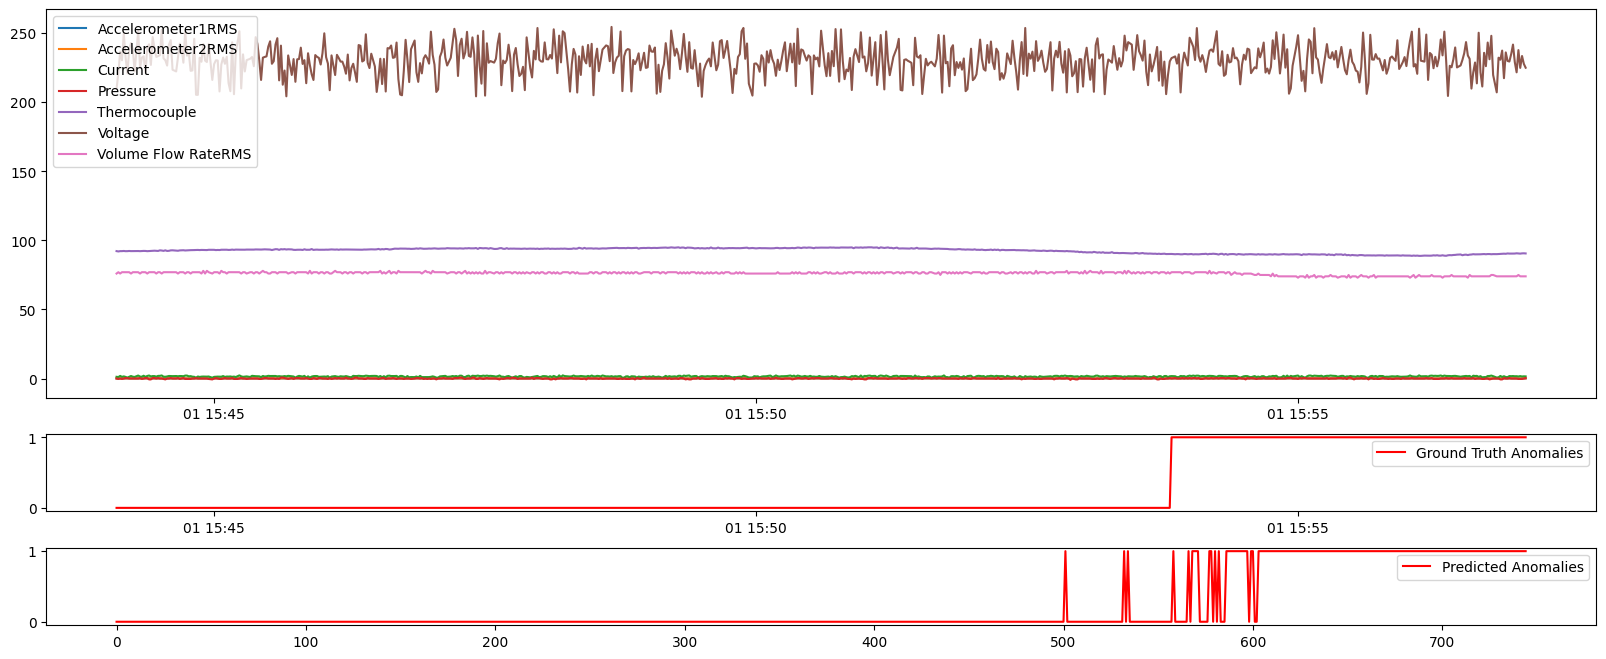

In [8]:
from utils.plot_data import plot_skab
from sklearn.metrics import accuracy_score, f1_score

anomalies = detector.detect_anomalies(df.drop(columns=['anomaly']).values)

print(accuracy_score(anomalies, df.anomaly))
print(f1_score(anomalies, df.anomaly))

plot_skab(df.drop(columns=['anomaly']), df.anomaly, anomalies)

## AutoAD with generated data

In [14]:
df = list_of_df[0]

detector = AutoAD(df[:400].drop(columns=['anomaly']))
detector.select_model()

c:\Users\Marcin_Kosiba\anaconda3\envs\inz\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


STARTING MODEL SELECTION PROCESS
MODEL GENERATION
MODEL GENERATION COMPLETED
MODEL TRAINING


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


13/13 [==============================] - 0s 2ms/step
MODEL TRAINING COMPLETED
MODEL SCORING
0.995 0.96875
<class 'models.HMM.HMM'> 5.865
13/13 [==============================] - 0s 748us/step
0.8735102716900734 1.0 1.0
<class 'models.DENSEAE.DenseAE'> 5.873510271690074
12/12 [==============================] - 0s 2ms/step
(400,) (400,)
0.8197197742038878 0.8025 0.44755244755244755
<class 'models.CONVAE.ConvAE'> 3.412429564413678
12/12 [==============================] - 0s 6ms/step
(400,) (400,)
0.6687707170132968 1.0 1.0
<class 'models.LSTMAE.LstmAE'> 5.668770717013297
13/13 [==============================] - 0s 2ms/step
(400,) (400,)
0.8024887537360487 1.0 1.0
<class 'models.LSTM.LstmPred'> 5.802488753736048
BEST MODEL SELECTED:  <class 'models.DENSEAE.DenseAE'>
13/13 [==============================] - 0s 830us/step


 1/24 [>.............................] - ETA: 0s

24/24 [==============================] - 0s 1ms/step


c:\Users\Marcin_Kosiba\anaconda3\envs\inz\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0.9208053691275168
0.8643678160919539


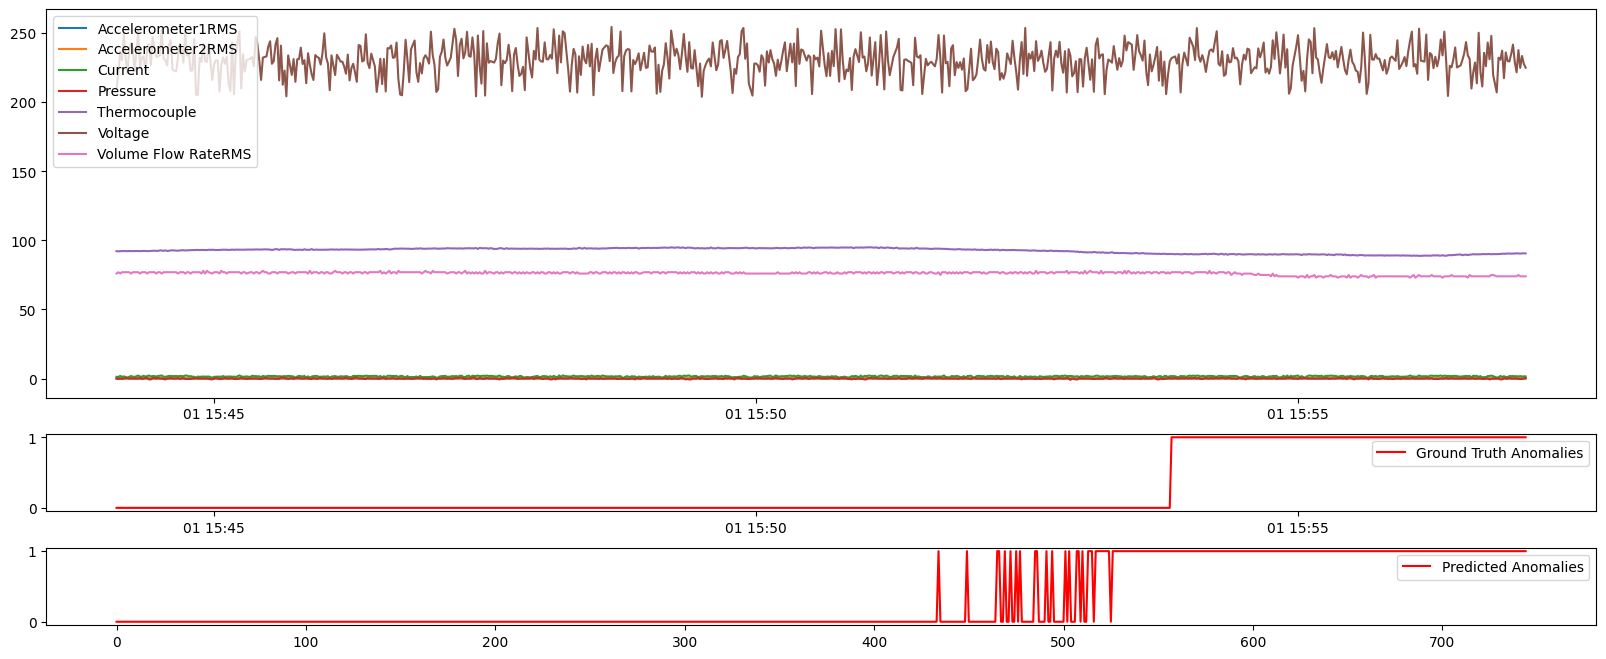

In [15]:
from utils.plot_data import plot_skab
from sklearn.metrics import accuracy_score, f1_score

anomalies = detector.detect_anomalies(df.drop(columns=['anomaly']).values)

print(accuracy_score(anomalies, df.anomaly))
print(f1_score(anomalies, df.anomaly))

plot_skab(df.drop(columns=['anomaly']), df.anomaly, anomalies)

## Anomalies generator tests

In [21]:
data = df[:400].drop(columns=['anomaly']).copy()

In [22]:
values = data.values

In [23]:
anomalies_count = int(0.1 * values.shape[0])

In [24]:
anomalies_count, values.shape

(40, (400, 8))

In [25]:
import random
point_anomalies = random.sample(range(values.shape[0]-150, values.shape[0]-140, 1), 2)
long_anomalies = [x for x in range(values.shape[0]-40, values.shape[0]-10, 1)]

In [26]:
anomalies = [0] * data.shape[0]
for anomaly in long_anomalies:
    values[anomaly] = values[anomaly] * random.choice([0.95, 0.9])
    anomalies[anomaly] = 1
for anomaly in point_anomalies:
    values[anomaly] = values[anomaly] * random.choice([0.95, 0.9])
    anomalies[anomaly] = 1
# values[long_anomalies[0]:long_anomalies[-1]] = values[long_anomalies[0]:long_anomalies[-1]] * random.choice([0.95, 0.9])
# for anomaly in point_anomalies:
#     anomalies[anomaly] = 1

In [27]:
d = pd.DataFrame(values, index=data.index, columns=df.drop(columns=['anomaly']).columns)

In [28]:
d.shape

(400, 8)

In [29]:
len(anomalies)

400

13/13 [==============================] - 0s 747us/step


c:\Users\Marcin_Kosiba\anaconda3\envs\inz\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1.0
1.0


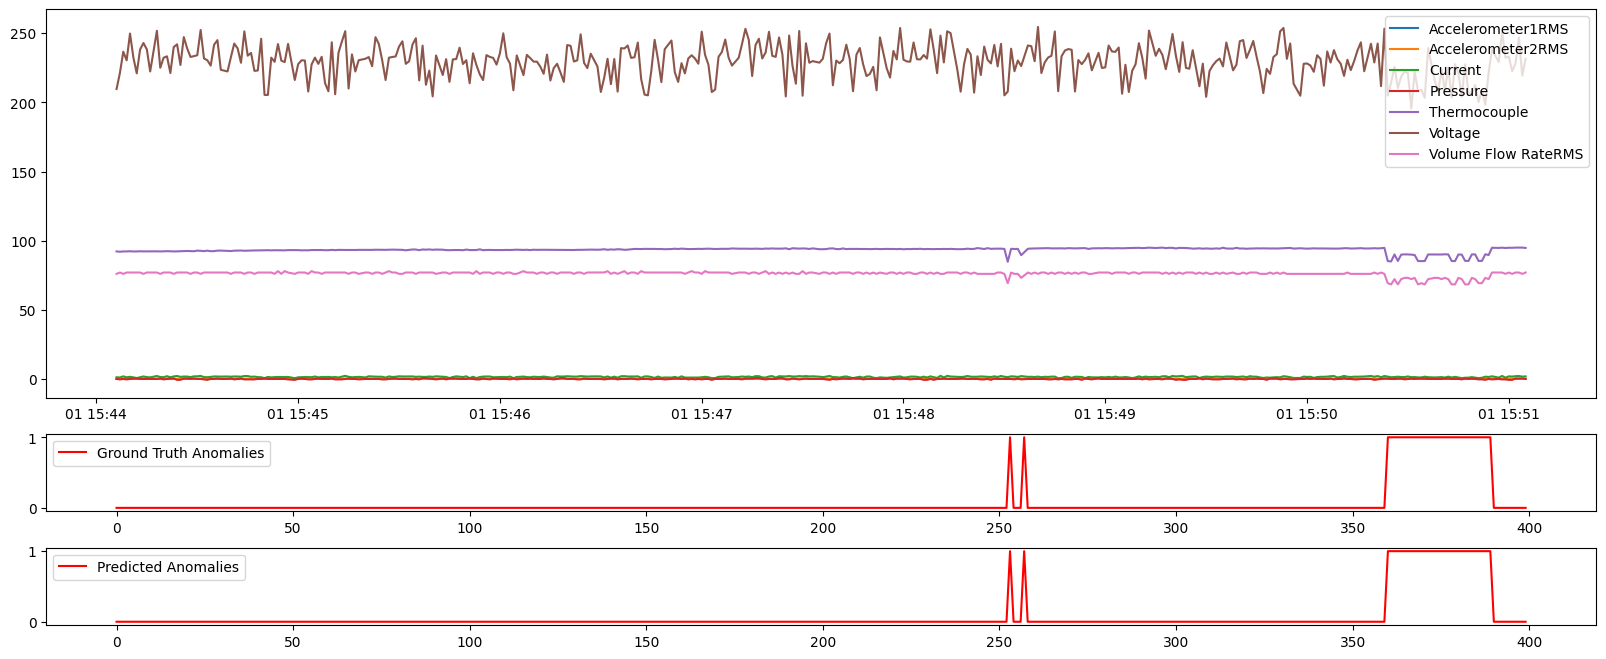

In [30]:
ano = detector.detect_anomalies(d.values)

print(accuracy_score(ano, anomalies))
print(f1_score(ano, anomalies))

plot_skab(d, anomalies, ano)

 1/29 [>.............................] - ETA: 0s

29/29 [==============================] - 0s 2ms/step


c:\Users\Marcin_Kosiba\anaconda3\envs\inz\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0.2979414951245937
0.44991511035653653


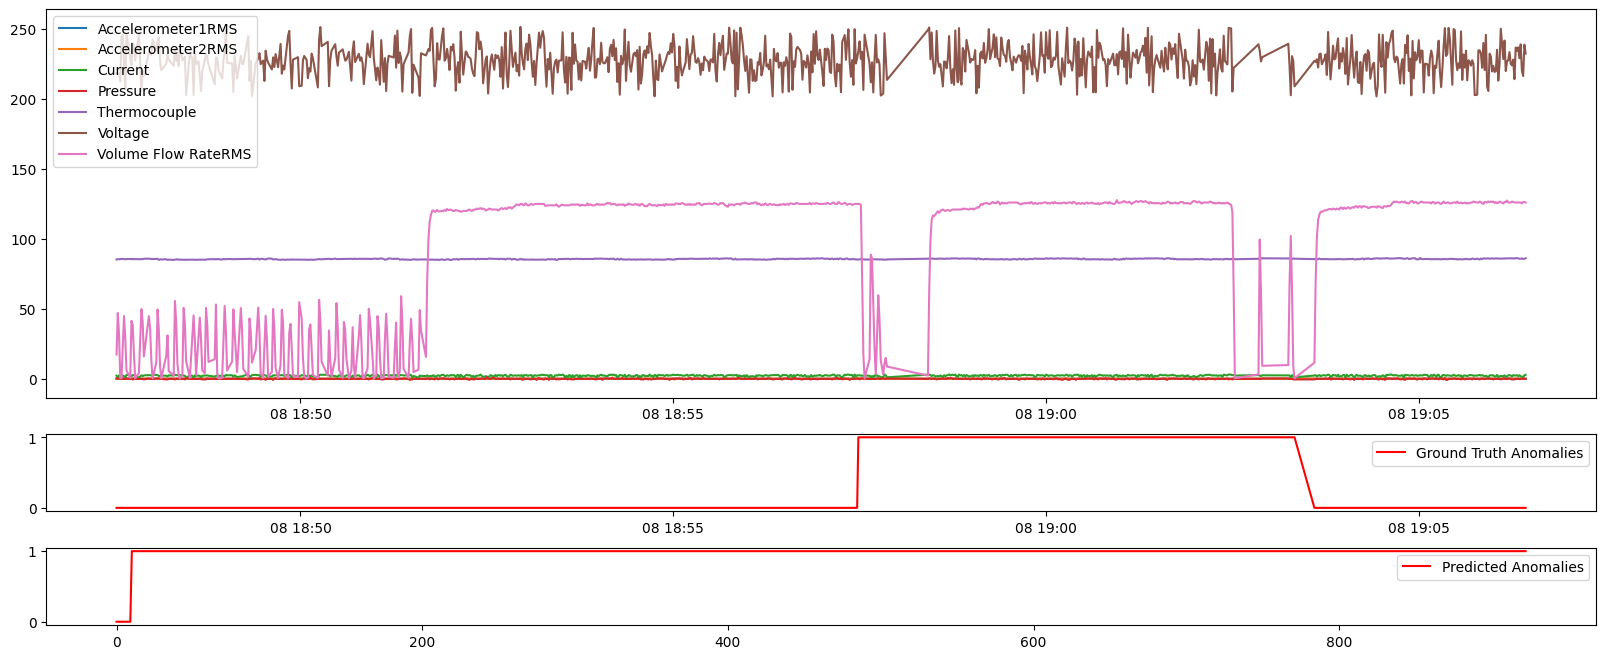

In [33]:
df = list_of_df[4]
anomalies = model.detect_anomalies(scaler.transform(df.drop(columns=['anomaly']).values))
print(accuracy_score(anomalies, df.anomaly))
print(f1_score(anomalies, df.anomaly))

plot_skab(df.drop(columns=['anomaly']), df.anomaly, anomalies)

In [84]:
x, y = selector.prepare_data_lstm(scaler.transform(df.drop(columns=['anomaly'])))
anomalies = model.detect_anomalies(x, y)

 1/23 [>.............................] - ETA: 0s

23/23 [==============================] - 0s 2ms/step


In [85]:
anomalies = np.array(10 * [0] + list(anomalies))
anomalies.shape, df.anomaly.shape

((745,), (745,))

0.9530201342281879


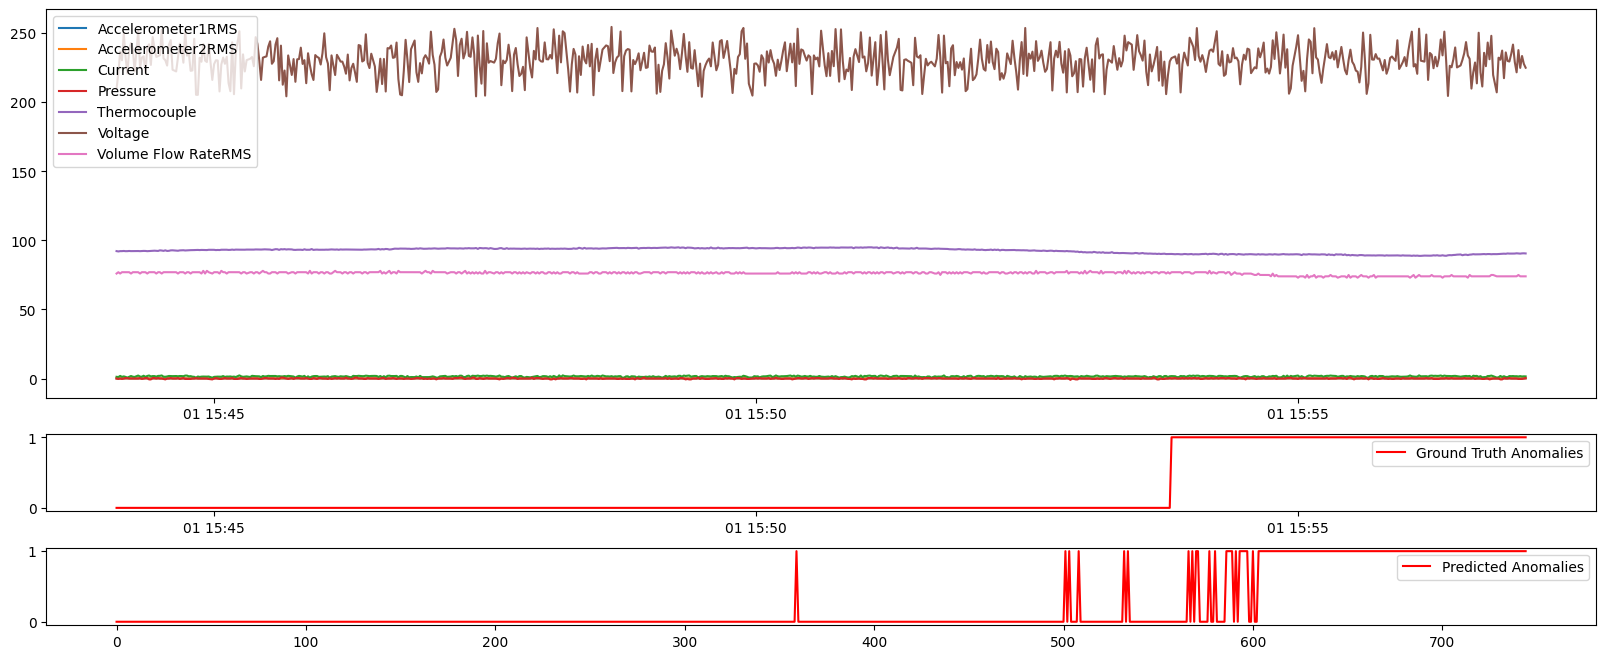

In [86]:
from utils.plot_data import plot_skab

print(accuracy_score(anomalies, df.anomaly))

plot_skab(df.drop(columns=['anomaly']), df.anomaly, anomalies)

In [57]:
type(selector.models[2])
model = selector.models[2]
x = selector.prepare_data_window_ae(scaler.transform(df.drop(columns=['anomaly'])))
anomalies = model.detect_anomalies(x)
anomalies = np.array(list(anomalies) + 31 * [0])

 1/23 [>.............................] - ETA: 0s

23/23 [==============================] - 0s 2ms/step


0.9140939597315436


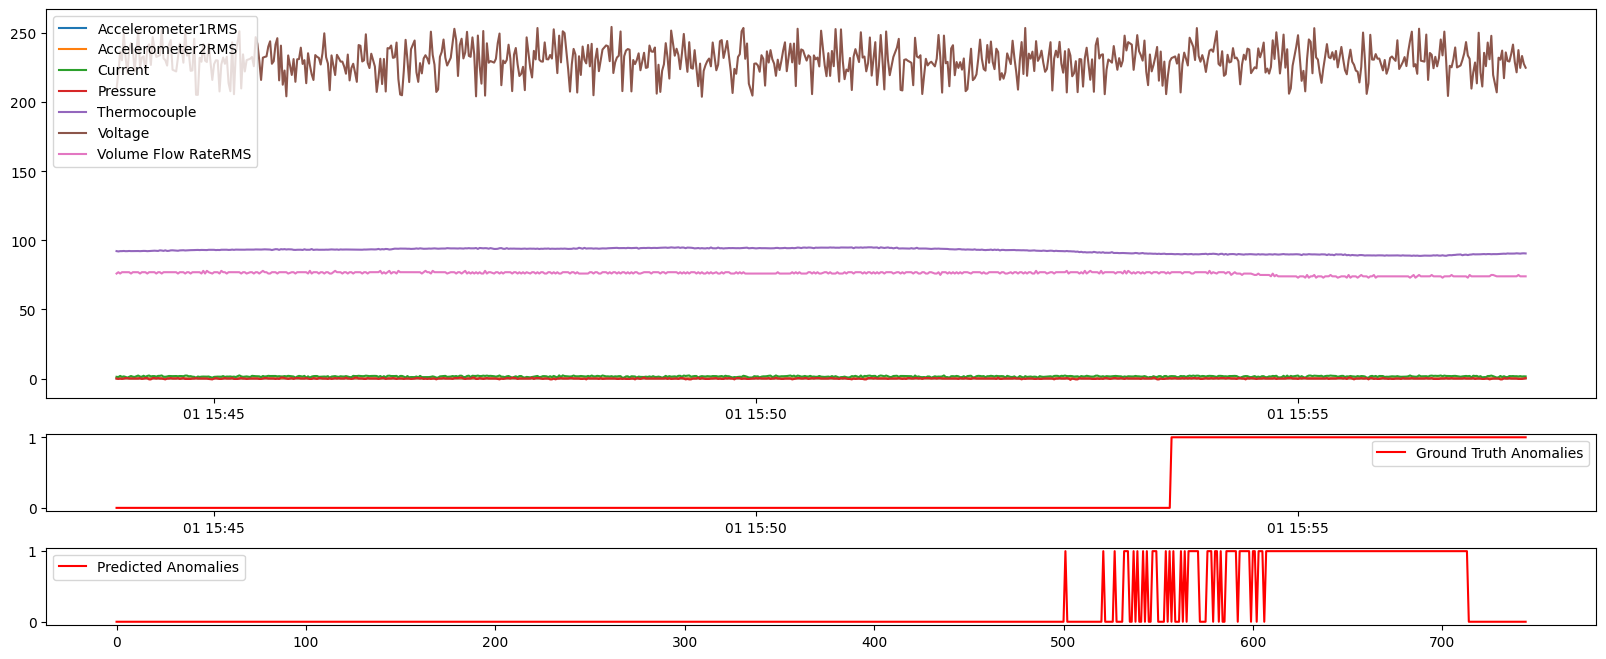

In [58]:
print(accuracy_score(anomalies, df.anomaly))

plot_skab(df.drop(columns=['anomaly']), df.anomaly, anomalies)